    Atividade
    ● Selecione uma série temporal
    ● Gere as bases de treinamento e teste baseadas em janela de tempo
        ○ https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
    ● Utilizando algum modelo de aprendizagem de máquinas, calcule os erros de previsão nas bases de treinamento e teste
        ○ Plote os gráficos de predição
        ○ O modelo de aprendizagem de máquinas foi melhor do que ARIMA?
    ● Dicas:
        ○ Quer normalizar os dados?
            https://machinelearningmastery.com/normalize-standardize-time-series-data-python/
        ○ Quer diferenciar os dados?
            https://machinelearningmastery.com/difference-time-series-dataset-python/

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from pandas import Series
from sklearn import metrics
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
def normalizando(base):
    values = dados.values
    values = values.reshape(len(values), 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(values)
    return scaler.transform(values)

In [3]:
def desnormalizando(base):
    values = dados.values
    values = values.reshape(len(values), 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(values)
    return scaler.inverse_transform(normalizando(base))

In [4]:
def janela_tempo(dados):
    arq = []
    for i in range(3,len(dados)):
        arq.append([dados[i-3],dados[i-2],dados[i-1],dados[i]])
    return arq

In [5]:
def metricas(y_test, predict):
    print("MAE:",metrics.mean_absolute_error(y_test, predict))
    print("MSE:",metrics.mean_squared_error(y_test, predict))
    print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predict)))

In [6]:
def model_linearRegression(x,y):
    x_train, x_test, y_train, y_test = train_test_split(normalizando(x), normalizando(y), test_size=0.3, random_state=30)
    model_linear_regression = LinearRegression()
    model_linear_regression.fit(x_train, y_train)
    pred = model_linear_regression.predict(x_test)
    metricas(x_test,pred)
    print("==============================================")
    plt.plot(y_test, color='r')
    plt.plot(pred, color='b')

In [7]:
dados  = Series.from_csv('CSVs/AirPassengers.csv',  header=0)

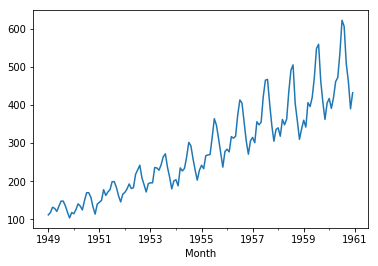

In [8]:
dados.plot()

In [9]:
valores = np.array(janela_tempo(dados))
x = valores[:,:3]
y = valores[3:,:1]

MAE: 7.782600321768676e-17
MSE: 9.884890153486363e-33
RMSE: 9.942278488096359e-17


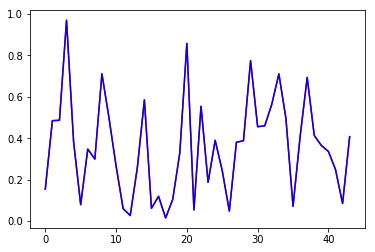

In [10]:
model_linearRegression(x,y)

In [11]:
def model_arima(dados):
    values = dados.values
    size = int(len(values) * 0.3)
    train, test = values[0:size], values[size:len(values)]
    history = [x for x in train]
    predictions = list()
    
    for t in range(len(test)):
        model = ARIMA(history, order=(5, 1, 0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
        
    metricas(test, predictions)
    plt.plot(test)
    plt.plot(predictions, color='red')

predicted=229.209515, expected=242.000000
predicted=240.909979, expected=209.000000
predicted=192.641613, expected=191.000000
predicted=199.053818, expected=172.000000
predicted=179.584618, expected=194.000000
predicted=217.662536, expected=196.000000
predicted=204.113047, expected=196.000000
predicted=196.300763, expected=236.000000
predicted=235.174974, expected=235.000000
predicted=228.902779, expected=229.000000
predicted=225.495940, expected=243.000000
predicted=236.307856, expected=264.000000
predicted=266.679467, expected=272.000000
predicted=271.821964, expected=237.000000
predicted=229.158606, expected=211.000000
predicted=213.951876, expected=180.000000
predicted=186.020064, expected=201.000000
predicted=226.578143, expected=204.000000
predicted=214.236881, expected=188.000000
predicted=187.051624, expected=235.000000
predicted=239.755205, expected=227.000000
predicted=220.737305, expected=234.000000
predicted=237.815008, expected=264.000000
predicted=252.750573, expected=302

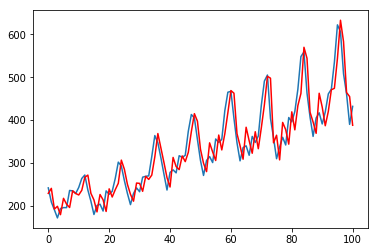

In [12]:
model_arima(dados)

conclusão

 - O ARIMA mostrou ser melhor na base de teste em relação ao model linerRegression.